# Classification

Importing MNIST dataset from sklearn preinstalled datasets,this dataset has images of hand-written text/numbers

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

above we see content header of mnist dataset where 'data' is set of features and 'target' is label and 'DESCR' describes the dataset

now, we will load the x(data,feature) and y(label) and see the shape

In [3]:
x,y=mnist["data"],mnist["target"]

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

so here we have 70000 images and each images has 784 feature,so total feature 70000 * 784,and each image is 28 * 28 pixels, and each pixel represents one pixel's intesity from 0(white) to 255(black).

to understand much better, we will take one feature (or pick one digit) and reshape to 28 * 28 and display

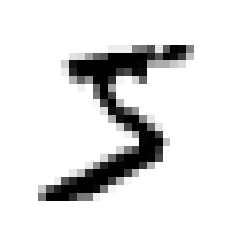

In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt

#taking any number
some_number = x[0]

#reshaping the same number
some_image_fnumber = some_number.reshape(28,28)

#plotting using pyplot and turning off axis , seting binary color and adjusing datapoints to avoid blank 
#or null spaces,instead of using plot or fit, we genrally use imshow to show image.
plt.imshow(some_image_fnumber,cmap=mlp.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
#lets check the actual label
y[0]

'5'

In [8]:
#now type casting to integer.
y=y.astype(np.uint8)

## Binary Classifier

Since the dataset is already divided into test and training set say as 60000 to 10000, so

In [9]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

and in binary classifier we generally take one value and see if the next instance is of classifier class, for eg we will now check if the value is 5 or not, because we took 5 as test number in above example.

In [10]:
#now, creating target vector for classifier:
y_train_5=(y_train==5) #true if 5 or else false
y_test_5=(y_test==5)

for classification we will use "Stochastic Gradient Descent(SGD)", because it is efficient for large datasets and 
and deals with training instances independently, hence good suited for online training, so lets do it:

In [11]:
from sklearn.linear_model import SGDClassifier

sgdc_class = SGDClassifier(random_state=42)
sgdc_class.fit(x_train,y_train_5)

sgdc_class.predict([some_number])

array([ True])

## Performance Measuring


### Measure Accuracy Using Cross-Validation

for cross validation we will use cross_val_score with k-fold validation:

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdc_class,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

well thats above 95%, awesome isn't it, but let's run the same on dumb classifier to check feature/digit is 5 or not:

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator): 
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

now, this means that if you are guessing that the number is not 5, well then you are 90% correct.

### Confusion Matrix

Though, the cross validation is fine, but for classication we use confusion matrix which simply states the count of times when instance of class A was confused with instance of class B, so you will look at row A and column B.

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgdc_class,x_train,y_train_5,cv=3)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [16]:
#to get perfect matrix:
y_perfect_predic=y_train_5
confusion_matrix(y_perfect_predic,y_train_5)

array([[54579,     0],
       [    0,  5421]])

each row represent actual class, and each column represents a predicted class, now here 53892 is correctly classified as non-5, hence are true-negative and 687 are wrongly classified as 5 hence false positive and 1891 are classified as wrong non-5, hence known as false negative and 3530 is correctly classifed as 5, hence true positive.

but a true classifier will have only true positive and true negative value hence we assumed new prediction value 'y_perfect_predic' and equaled it to 'y_train_5'and then we get true classifier.

So, if you are confused from above information, here is a diagram to help you:

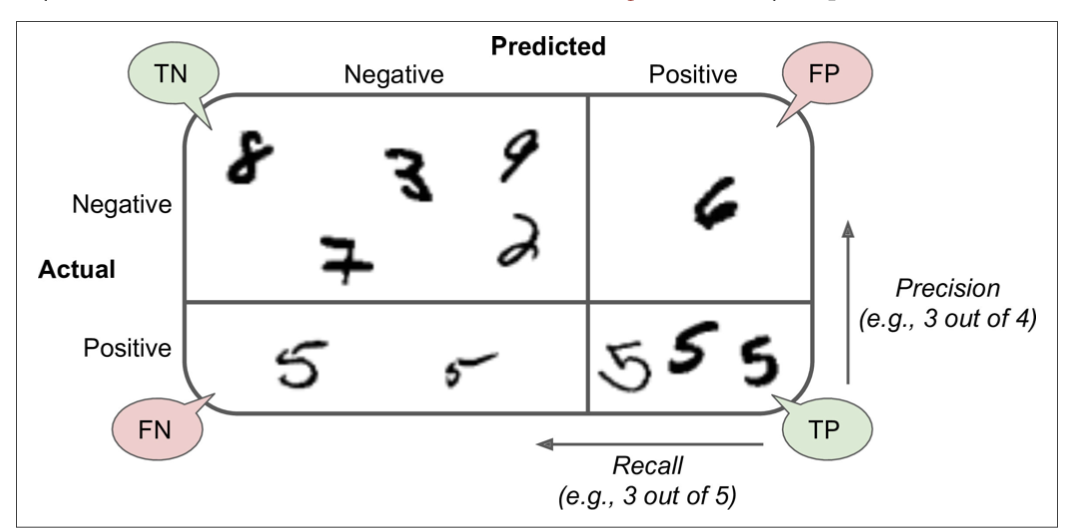

Precision: Accuracy of postive detection (TP/TP+FP)

Recall/Senstivity: True positive rate (TP/TP+FN)

### Precision, Recall and F1 Score

let's check precision and recall via skitlearn

In [18]:
from sklearn.metrics import precision_score
precision_score(y_train_pred,y_train_5)

0.6511713705958311

In [19]:
from sklearn.metrics import recall_score
recall_score(y_train_pred,y_train_5)

0.8370879772350012

amazingly it has lower precision score and higher recall score means it can successfully detect 83% of 5 in dataset with 65% of accuracy.

now, it's much better if we combine precision and recall together known as "F1 Score", it's not a normal but a harmonic mean which gaves more weightage to low values, so high "F1 Score" will be only because of high precision and recall.

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_pred,y_train_5)

0.7325171197343846

### Precision/Recall Tradeoff

Increasing precision reduces recall known as Precision/Recall Tradeoff

In [21]:
y_scores=sgdc_class.decision_function([some_number])
y_scores

array([2164.22030239])

In [23]:
theshold=0
y_some_digit_pred=(y_scores > theshold)
y_some_digit_pred

array([ True])

In [24]:
threshold=8000
y_some_digit_pred=(y_scores > threshold)
y_some_digit_pred

array([False])

now, to find the correct threshold to use:

In [26]:
y_scores = cross_val_predict(sgdc_class,x_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

now plotting precision and recall using matplot lib

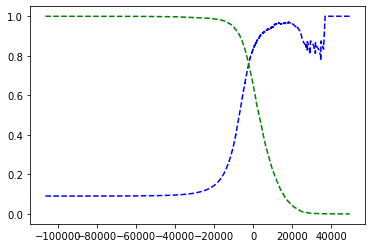

In [27]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precisoin_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
    [...]
plot_graph=plot_precisoin_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

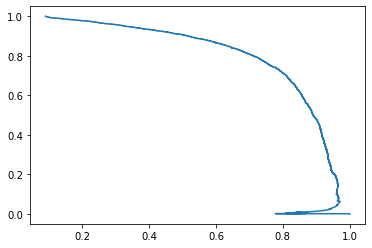

In [28]:
plt.plot(precisions,recalls)
plt.show()

In [29]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439594

In [31]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [32]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [34]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

### ROC Curve 

receiver operating characterstics curve is also used for binary classifier, ROC curve plots recall with FPR(false positive rate), FPR is the ratio of negative instances that are incorrectly classified as positive, i.e 1-TNR(true negative rate) which is ratio of negative instances that are correctly classifed as negative, also known as specificity, hence ROC plots recall/1-specificity:

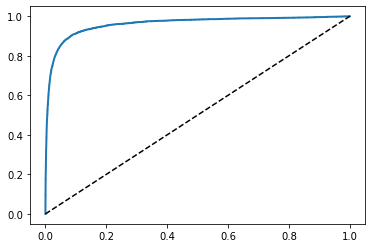

In [36]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    [...]
    
plot_roc=plot_roc_curve(fpr,tpr)
plt.show()

AUC(Area Under Curve)

In [44]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_curve(y_train_5,y_scores)

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

### Random Forest Classifier

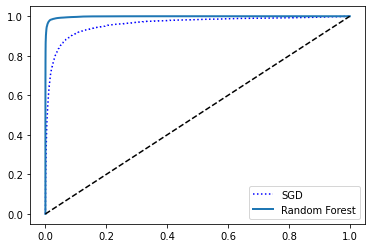

In [45]:
from sklearn.ensemble import RandomForestClassifier
ran_class=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(ran_class,x_train,y_train_5,cv=3,method="predict_proba")
y_score_forest=y_probas_forest[:,1]
fpr_forest,trp_forest,thresholds_forest=roc_curve(y_train_5,y_score_forest)
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,trp_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [46]:
#check roc score
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145